# Unsupervised learning - Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
data = wine.data
label = wine.target
columns = wine.feature_names

data = pd.DataFrame(data, columns=columns)

print(data.shape)
print(data.head())

(178, 13)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0        

In [9]:
# pre-processing
#min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data = scaler.fit_transform(data)

In [6]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

data = pca.fit_transform(data)

print(data.shape)

(178, 2)


In [10]:
# k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

kmeans.fit(data)

KMeans(n_clusters=3)

In [12]:
cluster = kmeans.predict(data)
print(cluster)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


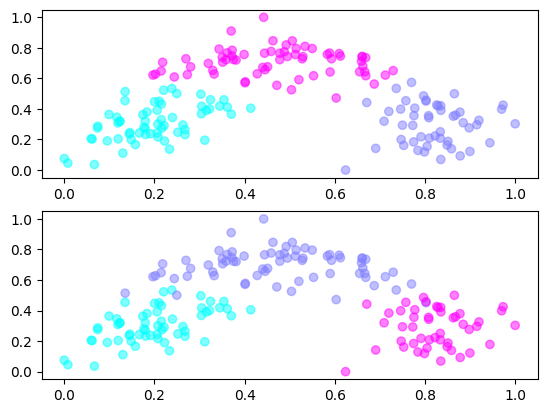

In [15]:
#visualization
plt.subplot(2,1,1)
plt.scatter(data[:,0], data[:,1], c=cluster, cmap='cool', alpha=0.5)
plt.subplot(2,1,2)
plt.scatter(data[:,0], data[:,1], c=label, cmap='cool', alpha=0.5)

plt.show()

In [16]:
# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')
complete_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
average_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')

single_clustering.fit(data)
complete_clustering.fit(data)
average_clustering.fit(data)

single_cluster = single_clustering.labels_
complete_cluster = complete_clustering.labels_
average_cluster = average_clustering.labels_

print(single_cluster)
print(complete_cluster)
print(average_cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 

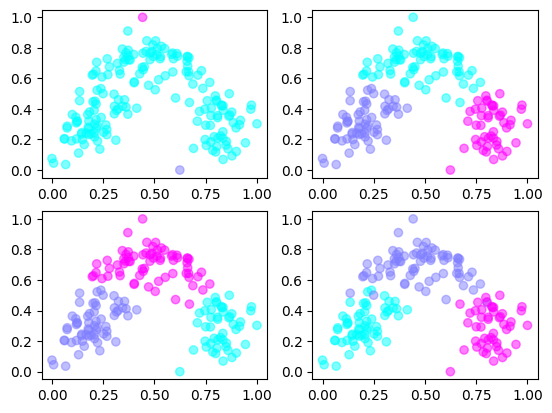

In [19]:
#visualization
plt.subplot(2,2,1)
plt.scatter(data[:,0], data[:,1], c=single_cluster, cmap='cool', alpha=0.5)
plt.subplot(2,2,2)
plt.scatter(data[:,0], data[:,1], c=complete_cluster, cmap='cool', alpha=0.5)
plt.subplot(2,2,3)
plt.scatter(data[:,0], data[:,1], c=average_cluster, cmap='cool', alpha=0.5)
plt.subplot(2,2,4)
plt.scatter(data[:,0], data[:,1], c=label, cmap='cool', alpha=0.5)

plt.show()

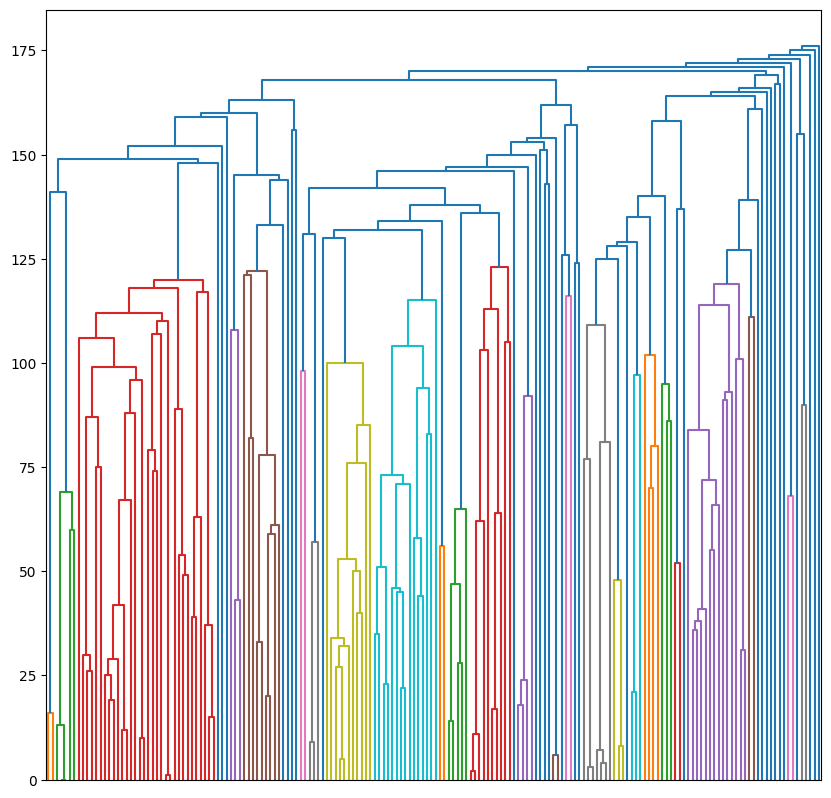

In [24]:
#dendrogram
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10,10))
children = single_clustering.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

dendrogram(linkage_matrix, p=len(data), labels=single_cluster, no_labels=True, show_contracted=True)

plt.show()

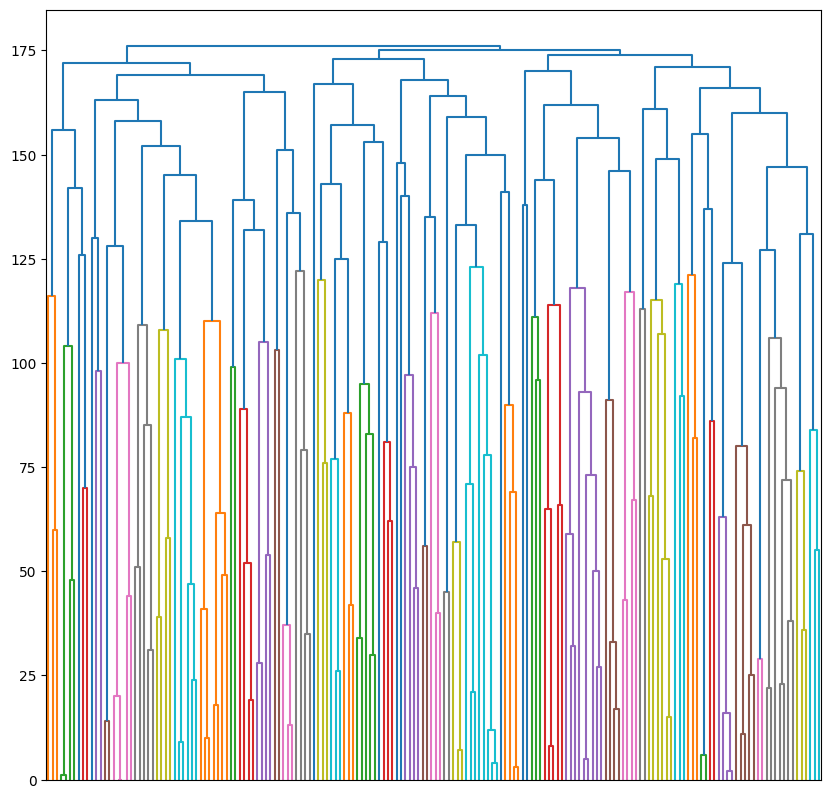

In [25]:
plt.figure(figsize=(10,10))
children = complete_clustering.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

dendrogram(linkage_matrix, p=len(data), labels=complete_cluster, no_labels=True, show_contracted=True)

plt.show()

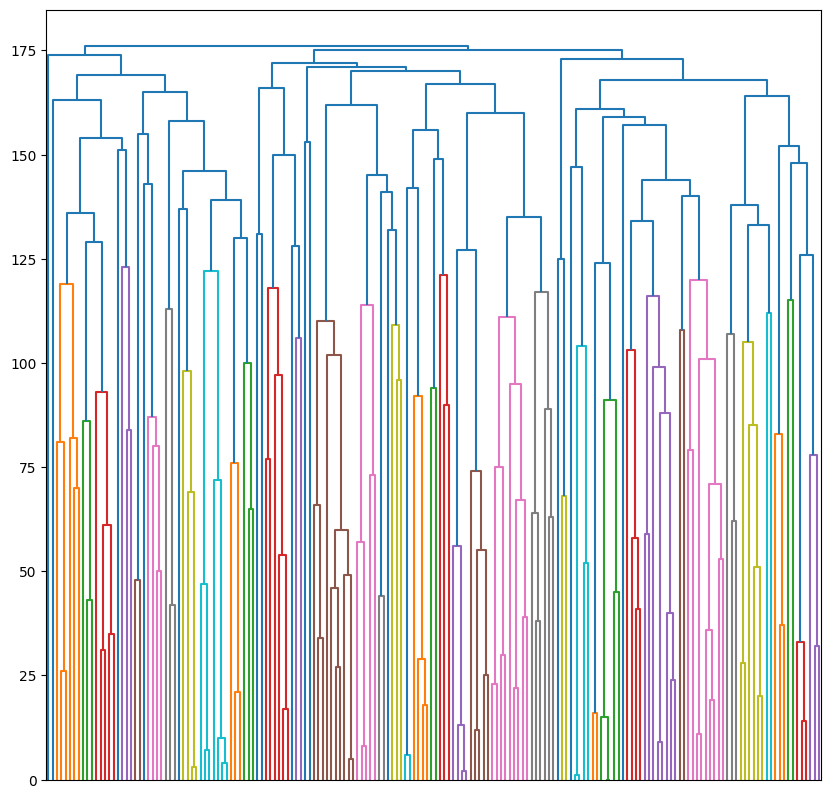

In [27]:
plt.figure(figsize=(10,10))
children = average_clustering.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

dendrogram(linkage_matrix, p=len(data), labels=average_cluster, no_labels=True, show_contracted=True)

plt.show()

In [28]:
# Silhouette
# metric that evalueate clustering

from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1

for n_cluster in range(2,11):
  kmeans = KMeans(n_clusters=n_cluster)
  kmeans.fit(data)
  cluster = kmeans.predict(data)
  score = silhouette_score(data, cluster)
  
  print('num of cluster: {}, silhouette score: {:.2f}'.format(n_cluster, score))

  if score > best_score:
    best_n = n_cluster
    best_score = score

print('best cluster num: {}, best silhouette score:{:.2f}'.format(best_n, best_score))

num of cluster: 2, silhouette score: 0.46
num of cluster: 3, silhouette score: 0.58
num of cluster: 4, silhouette score: 0.50
num of cluster: 5, silhouette score: 0.44
num of cluster: 6, silhouette score: 0.42
num of cluster: 7, silhouette score: 0.42
num of cluster: 8, silhouette score: 0.39
num of cluster: 9, silhouette score: 0.38
num of cluster: 10, silhouette score: 0.39
best cluster num: 3, best silhouette score:0.58


In [29]:
best_n = 1
best_score = -1

for n_cluster in range(2,11):
  average_clustering = AgglomerativeClustering(n_clusters=n_cluster, linkage='average')
  average_clustering.fit(data)
  cluster = average_clustering.labels_
  score = silhouette_score(data, cluster)

  print('num of cluster: {}, silhouette score: {:.2f}'.format(n_cluster, score))

  if score > best_score:
    best_n = n_cluster
    best_score = score

print('best cluster num: {}, best silhouette score:{:.2f}'.format(best_n, best_score))

num of cluster: 2, silhouette score: 0.47
num of cluster: 3, silhouette score: 0.57
num of cluster: 4, silhouette score: 0.51
num of cluster: 5, silhouette score: 0.44
num of cluster: 6, silhouette score: 0.35
num of cluster: 7, silhouette score: 0.32
num of cluster: 8, silhouette score: 0.34
num of cluster: 9, silhouette score: 0.37
num of cluster: 10, silhouette score: 0.39
best cluster num: 3, best silhouette score:0.57
